In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = 'heart1.csv'
df = pd.read_csv(data)

# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv("/content/heart1.csv")
# df.head()

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [4]:
# from sklearn.metrics.pairwise import normalize
df.target.value_counts(normalize =True)*100

1    54.455446
0    45.544554
Name: target, dtype: float64

In [5]:
df.shape

(303, 13)

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
target      0
dtype: int64

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
target        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


Text(0.5, 1.0, 'Age distribuition')

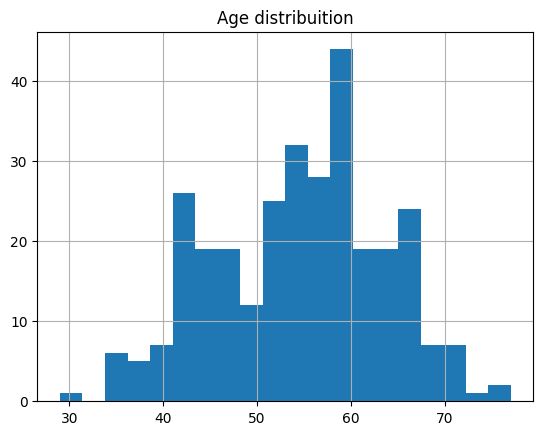

In [20]:
df['age'].hist(grid=True, bins=20);
plt.title('Age distribuition')

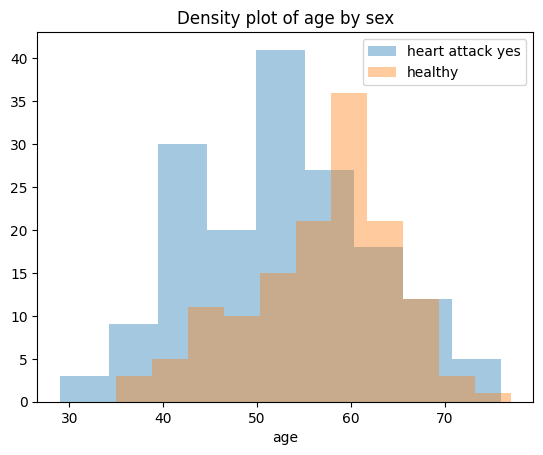

In [21]:
sns.distplot(df[df['target']==1]['age'],  label='heart attack yes',kde=False)
sns.distplot(df[df['target']==0]['age'], label='healthy',kde=False)
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

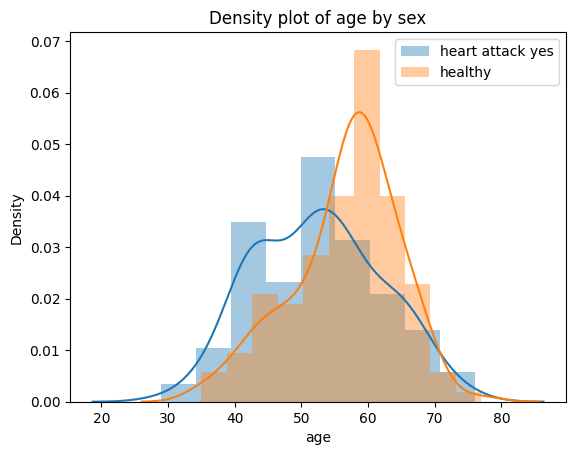

In [22]:
sns.distplot(df[df['target']==1]['age'],  label='heart attack yes',kde=True)
sns.distplot(df[df['target']==0]['age'], label='healthy',kde=True)
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

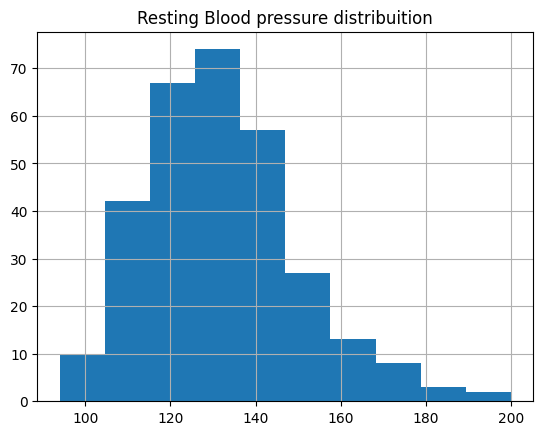

In [23]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

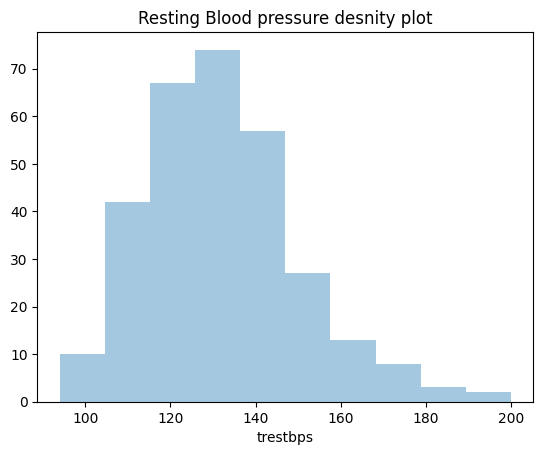

In [24]:
sns.distplot(df['trestbps'], bins=10,kde=False)
plt.title('Resting Blood pressure desnity plot')

<AxesSubplot: xlabel='oldpeak'>

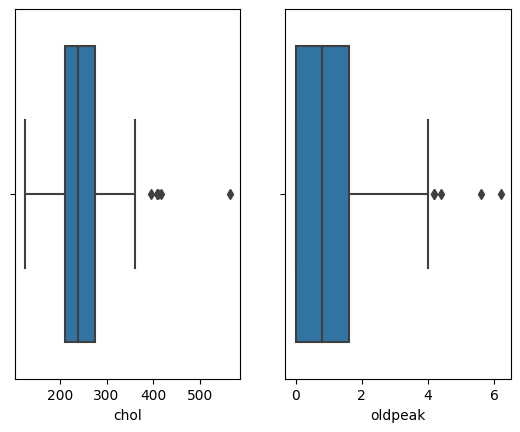

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=df, orient='v', ax=axes[0])
sns.boxplot(x='oldpeak', data=df,  orient='v', ax=axes[1])

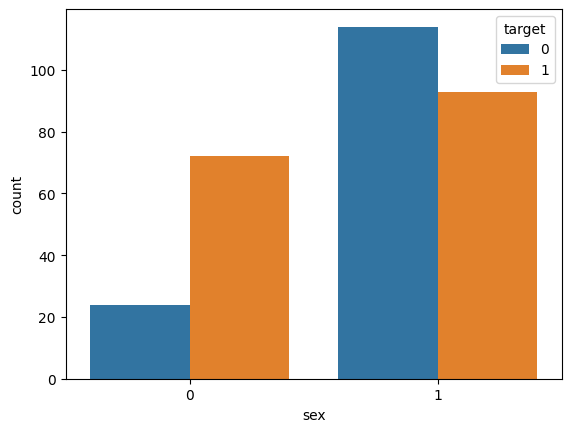

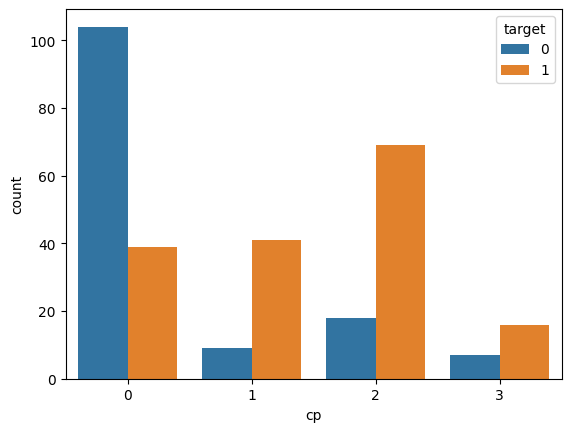

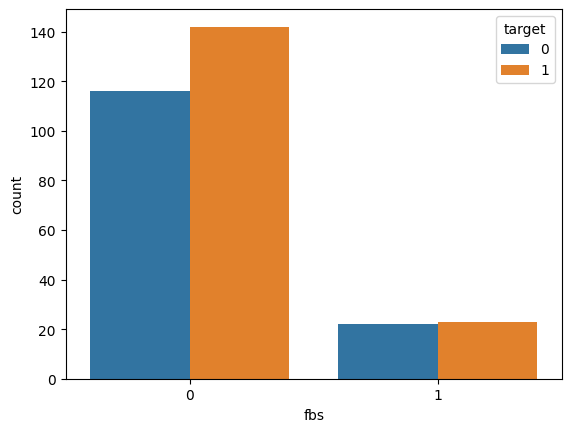

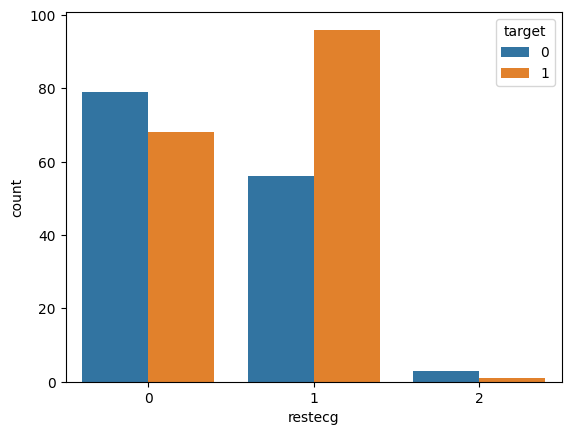

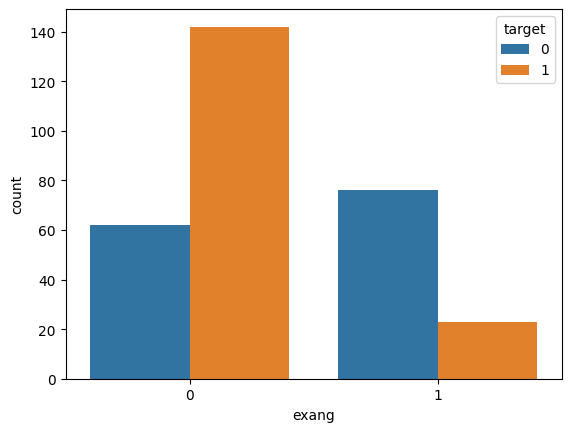

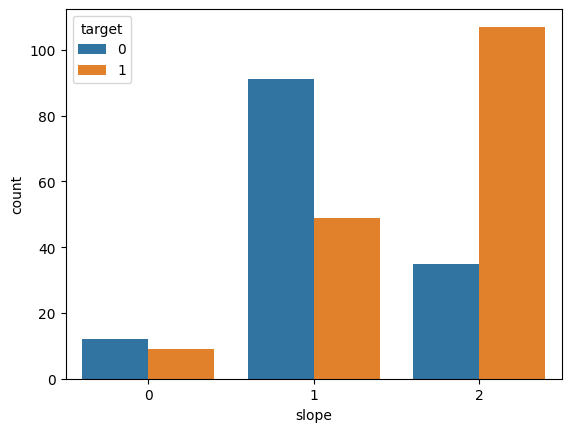

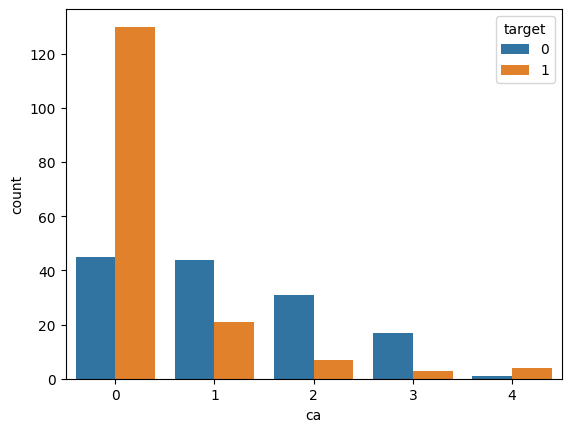

In [9]:
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca']

for list_var in cat_feat:
  sns.countplot(x=list_var, hue='target', data=df)
  plt.show()


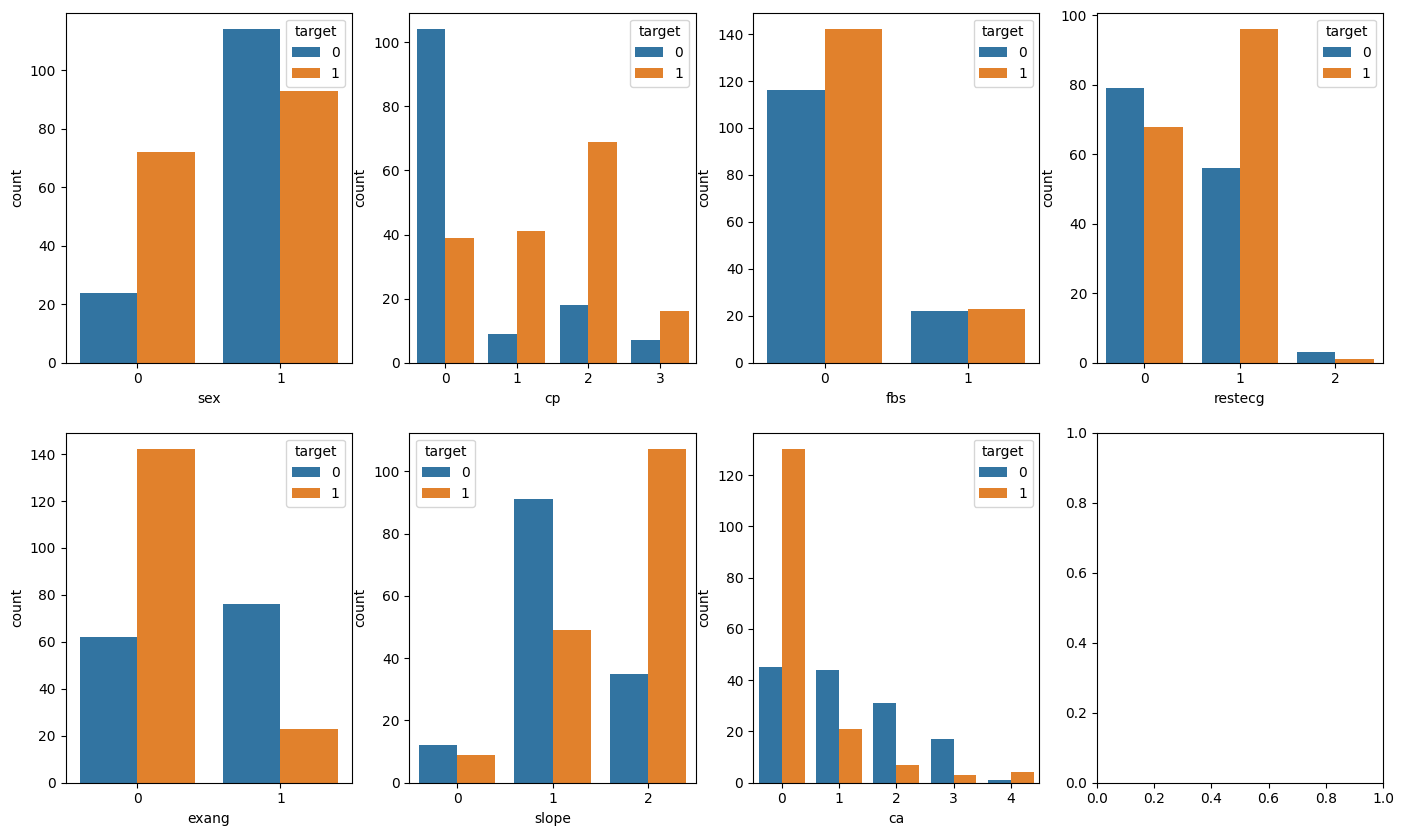

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'target']

for idx, feature in enumerate(cat_feat):
    if feature != 'target':
        ax = axes[int(idx/4), idx%4]
        # ax = axes[1,2]

        sns.countplot(x=feature, hue='target', data=df,ax=ax)

Text(0.5, 1.0, 'Count of target feature by sex')

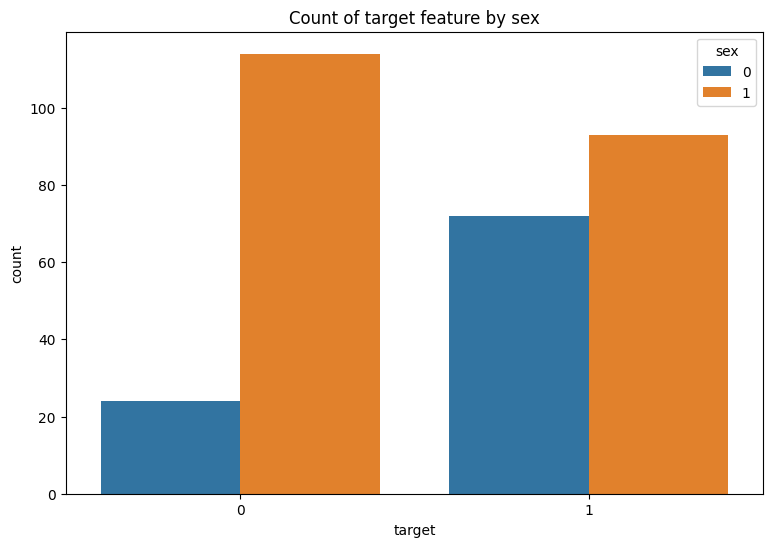

In [12]:
plt.rcParams['figure.figsize'] = (9,6)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

In [13]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,-0.430696


<AxesSubplot: >

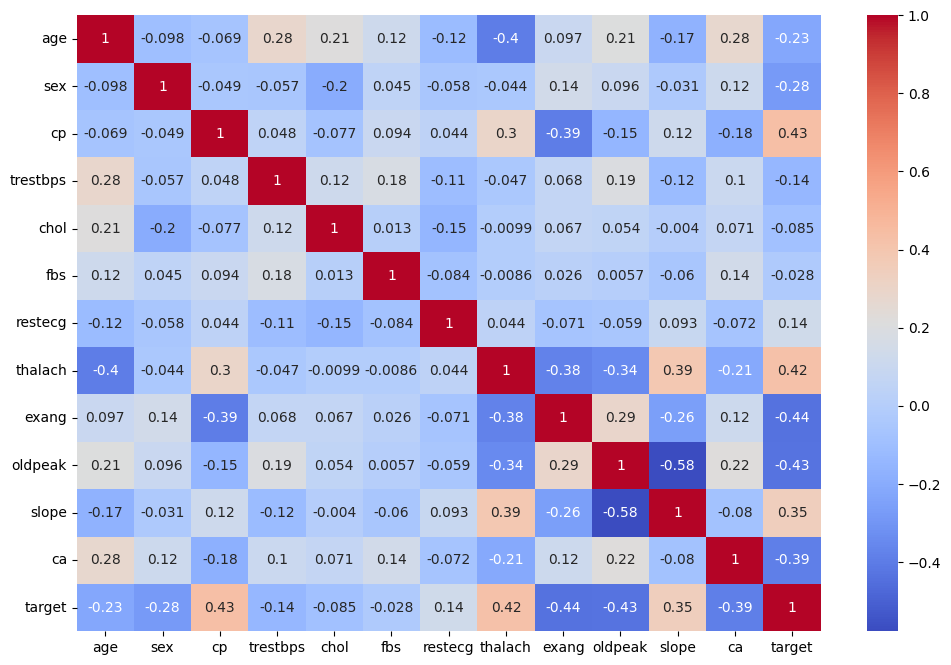

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Text(0.5, 1.0, ' CP vs Thalach in rest')

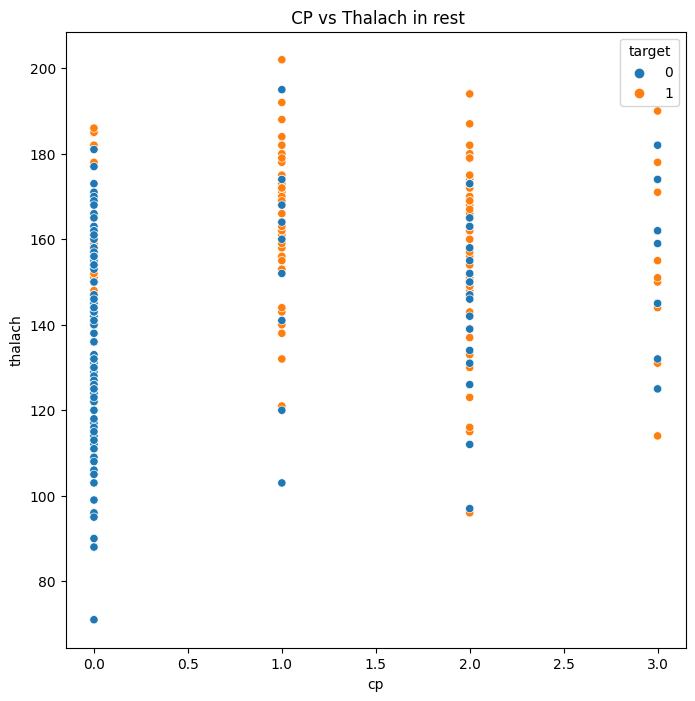

In [15]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='cp', y='thalach', hue='target', size=None, data=df)
plt.title(' CP vs Thalach in rest')

In [16]:
X = df.drop(columns=['target'])#independent variable
y = df['target']#dependent or target value
print(X.shape)
print(y.shape)

(303, 12)
(303,)


In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(212, 12)
(91, 12)


In [18]:
clf = tree.DecisionTreeClassifier()

clf.fit(x_train,y_train)

y_train_pred = clf.predict(x_train)

y_test_pred = clf.predict(x_test)

In [19]:
len(y_train_pred)

212

In [20]:
len(y_test_pred)

91

In [21]:
a=100
print('The value of a is', a,' and that is it')

The value of a is 100  and that is it


In [22]:
print(f'The value of a is {a} and that is it')

The value of a is 100 and that is it


In [23]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues')#For g and G , the maximum number of significant digits
    plt.tight_layout()
    plt.show()

In [24]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 1.0
Test score 0.6923076923076923


Train Data Confusion matrix


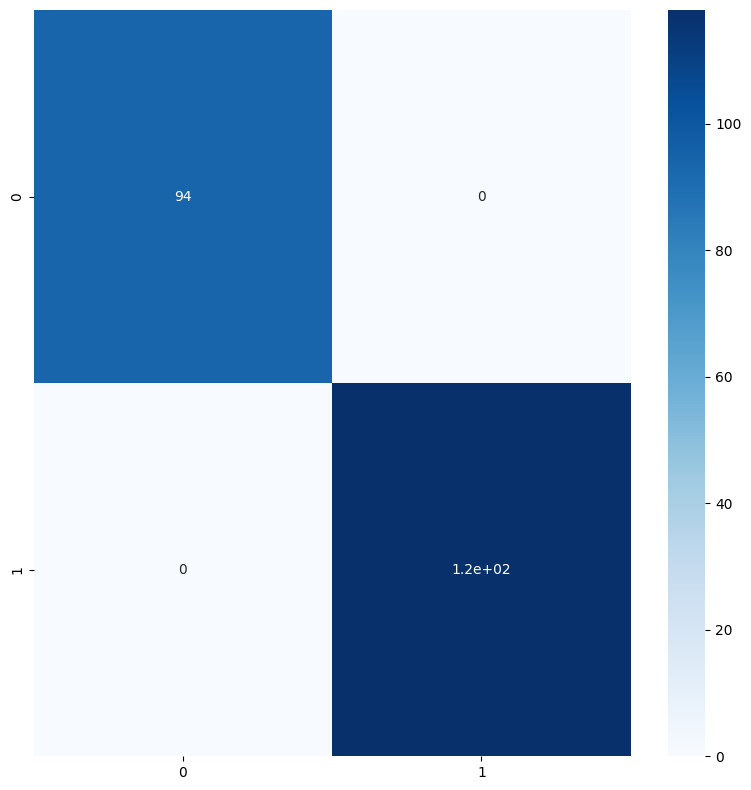

In [25]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train Data')

Test Data Confusion matrix


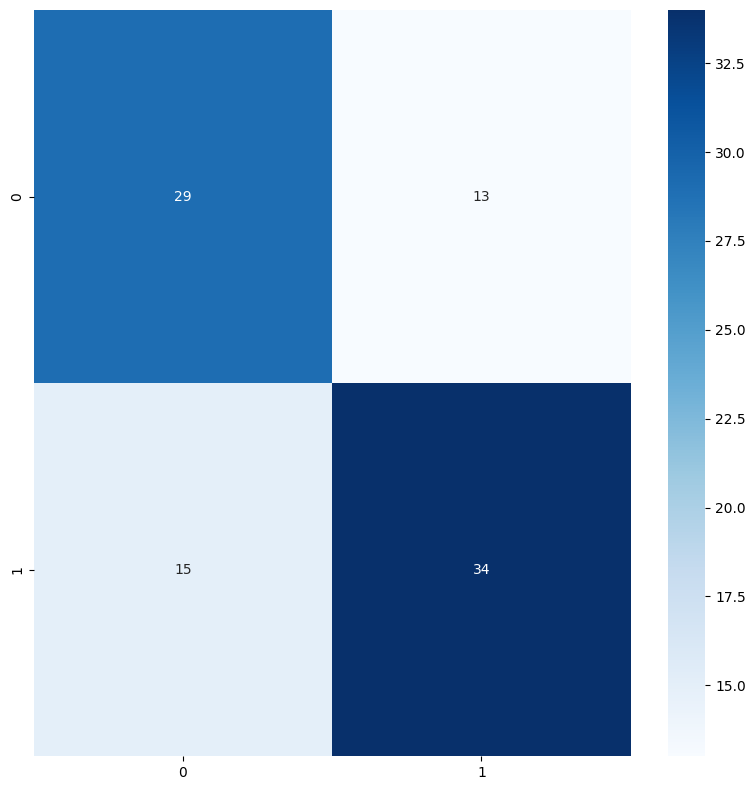

In [26]:
plot_confusionmatrix(y_test_pred,y_test,dom='Test Data')

In [27]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,50,75,100,150]
df = pd.DataFrame(columns=[c_parameter_name, 'train_accuracy','test_accuracy'])

for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter,splitter='best')
    y_pred_train = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    acc_score_train = accuracy_score(y_train,model.predict(x_train))*100
    # acc_score_train = accuracy_score(y_train,y_pred_train)*100
    df = df.append({c_parameter_name : input_parameter , 'train_accuracy' : acc_score_train, 'test_accuracy' : acc_score}, ignore_index=True)
print(df)
print("")

    max_depth  train_accuracy  test_accuracy
0         1.0       75.471698      76.923077
1         2.0       80.188679      73.626374
2         3.0       86.320755      79.120879
3         4.0       88.679245      74.725275
4         5.0       95.283019      70.329670
5         6.0       96.698113      72.527473
6         7.0       98.584906      70.329670
7         8.0       99.056604      71.428571
8         9.0      100.000000      72.527473
9        10.0      100.000000      68.131868
10       11.0      100.000000      71.428571
11       12.0      100.000000      67.032967
12       13.0      100.000000      70.329670
13       14.0      100.000000      72.527473
14       15.0      100.000000      72.527473
15       20.0      100.000000      71.428571
16       50.0      100.000000      73.626374
17       75.0      100.000000      72.527473
18      100.0      100.000000      73.626374
19      150.0      100.000000      69.230769



In [28]:
clf = tree.DecisionTreeClassifier(max_depth=3,splitter='best')
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [29]:
accuracy_score(y_test,y_test_pred)*100

79.12087912087912

In [30]:
accuracy_score(y_train,y_train_pred)*100

86.32075471698113

Test Confusion matrix


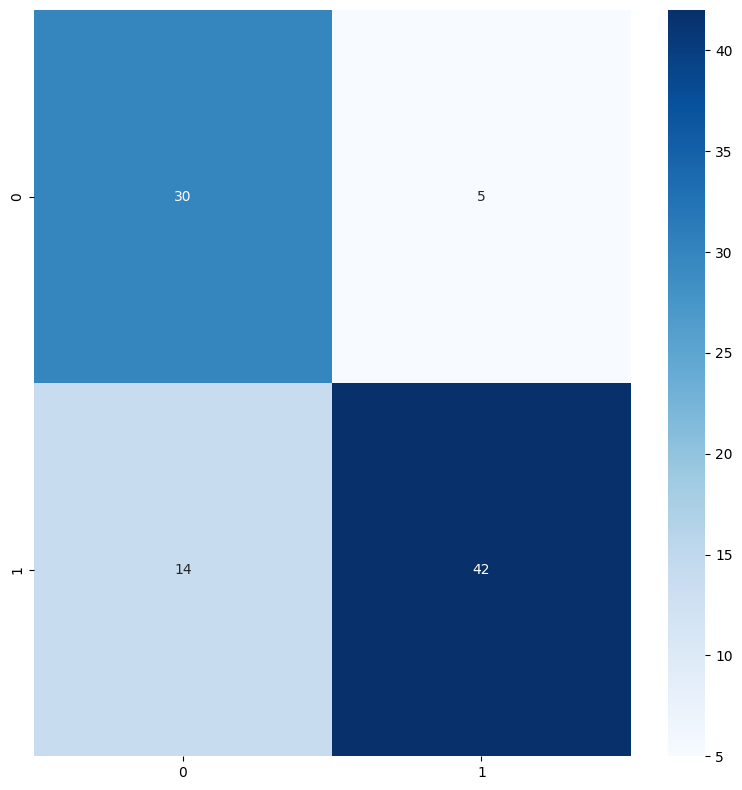

In [31]:
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75        33
           1       0.91      0.74      0.82        58

    accuracy                           0.79        91
   macro avg       0.79      0.81      0.79        91
weighted avg       0.82      0.79      0.80        91



In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 45,max_depth=3,n_estimators=100)

rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [37]:
accuracy_score(y_test,y_test_pred)*100

79.12087912087912

In [38]:
accuracy_score(y_train,y_train_pred)*100

90.09433962264151

Test Confusion matrix


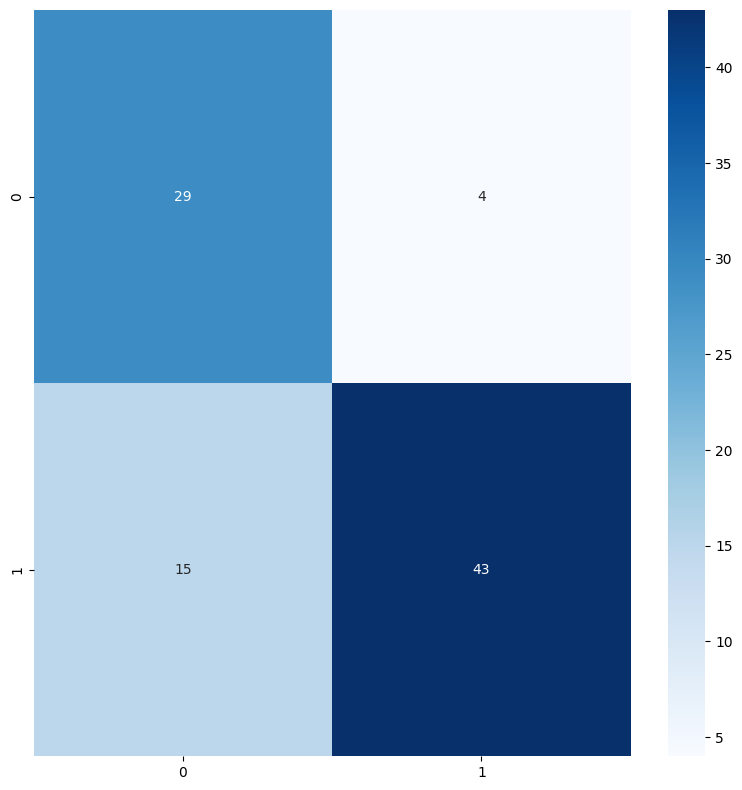

In [39]:
plot_confusionmatrix(y_test_pred,y_test,dom='Test')